In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [3]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display 

from IPython.display import HTML
style = "<style>{width:50% !important; height:10% !important;}</style>"
HTML(style)

### 2.7.1 ###

In [4]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)

### 2.7.2 ###

In [5]:
df_tree = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_data_tree.csv')

In [6]:
df_tree.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [7]:
df_tree.isnull().sum()

sex      0
exang    0
num      0
dtype: int64

In [8]:
X = df_tree.drop(['num'], axis=1)
y = df_tree.num

In [9]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)

In [10]:
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

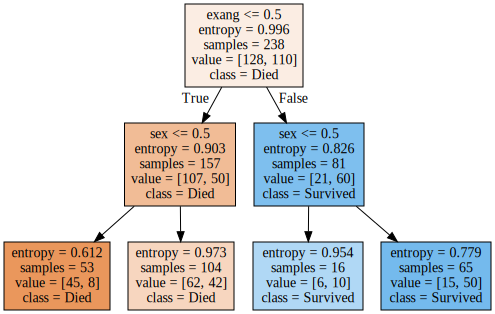

In [11]:
# дерево графически

graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X), 
                                    class_names=['Died', 'Survived'],
                                    filled=True))

display(SVG(graph.pipe(format='svg')))

#### Information Gain ####

$$IG = E(Y) - E(Y|X)$$
$n_0, n_1$ - выборка при x = 0, x = 1

$n_0 + n_1 = N$

$E_0, E_1$ - энтропия x = 0, x = 1
$$E(Y|X) = n_0/N * E_0 +  n_1/N * E_1 $$

In [12]:
E0 = 0.903
E1 = 0.826
n0 = 157
n1 = 81
N = n0 + n1
IG = 0.996 - (n0*E0 + n1*E1)/N
round(IG,3)

0.119

### 2.7.5 ###

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

In [14]:
iris = load_iris()
X = iris.data
y = iris.target

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75)

In [16]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)

In [17]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
predicted = dt.predict(X_test)

In [19]:
predicted

array([0, 2, 2, 1, 0, 2, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 2, 2, 0, 2, 1, 0,
       1, 1, 1, 1, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2])

In [20]:
scores_df_tree = pd.DataFrame()

rs = np.random.seed(42)

max_depth_values = range(1, 100)

In [21]:
for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf,
                                           X_train,
                                           y_train,
                                           cv=5).mean()
    
    temp_score_data = pd.DataFrame(
        {'max_depth': [max_depth],
         'train_score': [train_score],
         'test_score': [test_score],
         'cross_val_score': [mean_cross_val_score]})
    
    scores_df_tree = scores_df_tree.append(temp_score_data)

In [22]:
# разворачиваем датафрейм в плоский формат

scores_df_tree_long = pd.melt(scores_df_tree, id_vars='max_depth',
                                value_vars=['train_score', 'test_score', 'cross_val_score'],
                                var_name='sep_type', value_name='score')

In [23]:
scores_df_tree_long[scores_df_tree_long.sep_type == 'cross_val_score'].sort_values(
    ['score', 'max_depth'],
    ascending=[False, True]).head(5)

,max_depth,sep_type,score
202,5,cross_val_score,0.964032
203,6,cross_val_score,0.964032
205,8,cross_val_score,0.964032
206,9,cross_val_score,0.964032
207,10,cross_val_score,0.964032


**класс GridSearchCV**

In [24]:
iris = load_iris()
X = iris.data
y = iris.target

In [25]:
clf_iris = DecisionTreeClassifier()

In [26]:
parametrs = (
    {'criterion': ['gini', 'entropy'],
     'max_depth': range(1, 10),
     'min_samples_split': range(2, 10),
     'min_samples_leaf': range(1, 10)}
)

In [27]:
search = GridSearchCV(clf_iris, parametrs, cv=5)

In [28]:
search.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [29]:
search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [30]:
best_tree = search.best_estimator_

In [31]:
best_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Чем больше данных, сложность модели и число её параметров, тем дольше будет вестись поиск GridSearchCV.

Однако бывают случаи, когда модель нужна здесь и сейчас, и для этого есть **RandomizedSearchCV!**

Пробегаясь по рандомной подвыборке параметров, он ищет наиболее хорошую модель и делает это быстрее полного перебора параметров, хотя и может пропустить оптимальные параметры.



In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
iris = load_iris()
X = iris.data
y = iris.target

In [34]:
clf_iris = DecisionTreeClassifier()

In [35]:
parametrs = (
    {'criterion': ['gini', 'entropy'],
     'max_depth': range(1, 10),
     'min_samples_split': range(2, 10),
     'min_samples_leaf': range(1, 10)}
)

In [36]:
search = RandomizedSearchCV(clf_iris, parametrs, cv=5)

In [37]:
search.fit(X, y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [38]:
search.best_params_

{'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_depth': 6,
 'criterion': 'entropy'}

In [39]:
best_tree = search.best_estimator_

In [40]:
best_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')